In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy import stats

## Describe Data

In [4]:
# 2. Load data from 2 Excel files

df_raw = pd.read_excel('C:/Users/caberoca/Danone/DACH Data and Digital Powerhouse - Data & Analytics Team/UseCaseFiles/MCE/MCE MMM Fortimel/Project/MMM_Fortimel/output_df/final_df.xlsx', index_col=[0])

In [5]:
df_raw.head()

,date,email,phone,f2f,videocall,email_cost,phone_cost,f2f_cost,videocall_cost,week_end_date,Invoiced Sales (CAF)
0,2021-02-07,4.2,72,9,0,98.28,2083.68,686.43,0.00,2021-02-07,238337.87
1,2021-02-14,18.0,103,13,2,421.20,2980.82,991.51,104.16,2021-02-14,206858.40
2,2021-02-21,31.2,132,5,4,730.08,3820.08,381.35,208.32,2021-02-21,301358.98
3,2021-02-28,15.0,147,34,10,351.00,4254.18,2593.18,520.80,2021-02-28,549792.38
4,2021-03-07,28.2,154,22,21,659.88,4456.76,1677.94,1093.68,2021-03-07,200329.43


In [6]:
df_raw.shape

(117, 11)

In [7]:
df_raw.columns

Index(['date', 'email', 'phone', 'f2f', 'videocall', 'email_cost',
       'phone_cost', 'f2f_cost', 'videocall_cost', 'week_end_date',
       'Invoiced Sales (CAF)'],
      dtype='object')

In [15]:
# Drop columns

df_merged = df_raw.drop(columns=['email','phone','f2f','videocall','week_end_date'])
df_merged = df_merged.rename(columns={'Invoiced Sales (CAF)': 'sales'})

In [16]:
df_merged.shape

(117, 6)

In [17]:
df_merged.head()

,date,email_cost,phone_cost,f2f_cost,videocall_cost,sales
0,2021-02-07,98.28,2083.68,686.43,0.00,238337.87
1,2021-02-14,421.20,2980.82,991.51,104.16,206858.40
2,2021-02-21,730.08,3820.08,381.35,208.32,301358.98
3,2021-02-28,351.00,4254.18,2593.18,520.80,549792.38
4,2021-03-07,659.88,4456.76,1677.94,1093.68,200329.43


In [18]:
df_merged.describe()

,date,email_cost,phone_cost,f2f_cost,videocall_cost,sales
count,117,117.000000,117.000000,117.000000,117.000000,117.000000
mean,2022-03-20 00:00:00,707.280000,2863.575897,8543.543761,528.367179,375015.499942
min,2021-02-07 00:00:00,98.280000,260.460000,76.270000,0.000000,75874.660000
25%,2021-08-29 00:00:00,416.520000,2286.260000,4118.580000,156.240000,285498.650000
50%,2022-03-20 00:00:00,627.120000,2778.240000,7474.460000,364.560000,346065.160000
75%,2022-10-09 00:00:00,912.600000,3414.920000,12279.470000,677.040000,458965.450000
max,2023-04-30 00:00:00,2293.200000,5469.660000,24787.750000,2083.200000,843586.260000
std,NaN,403.866477,920.079571,5528.418431,517.252989,138228.824885


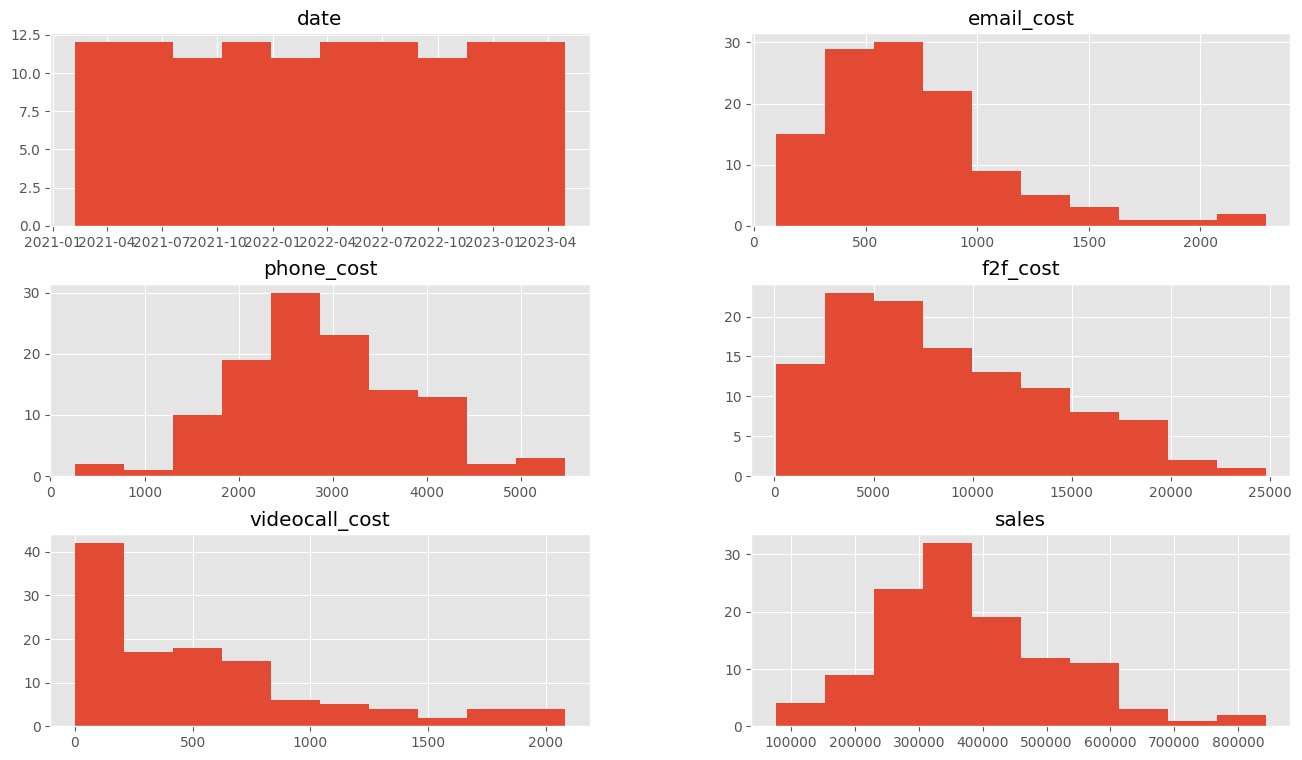

In [19]:
df_merged.hist()
plt.show()

In [20]:
df_merged.corr()

,date,email_cost,phone_cost,f2f_cost,videocall_cost,sales
date,1.000000,0.520684,-0.430005,0.793568,0.305491,0.058184
email_cost,0.520684,1.000000,-0.023755,0.562540,0.313581,0.061394
phone_cost,-0.430005,-0.023755,1.000000,-0.258917,0.076795,0.113773
f2f_cost,0.793568,0.562540,-0.258917,1.000000,0.395507,0.070522
videocall_cost,0.305491,0.313581,0.076795,0.395507,1.000000,0.048894
sales,0.058184,0.061394,0.113773,0.070522,0.048894,1.000000


### Drop outliers

In [13]:
df_merged.shape

(612, 17)

In [14]:
df_merged.columns

Index(['email', 'f2f', 'f2f_wo_sample', 'f2f_sample', 'samples_shop', 'phone',
       'virtual_web', 'total_touchpoints', 'samples', 'samples_from_shop',
       'touchpoints_shop', 'samples_from_rep', 'touchpoints_rep', 'katis_klub',
       'event_participants_brick', 'offline_mailings', 'prescriptions'],
      dtype='object')

In [15]:
count = (df_merged[['email', 'f2f', 'f2f_wo_sample', 'total_touchpoints', 'samples', 'samples_from_shop', 'touchpoints_shop', 'samples_from_rep', 'touchpoints_rep', 'phone', 'katis_klub', 'event_participants_brick', 'offline_mailings', 'virtual_web', 'prescriptions']] == 0).sum()
print(count)

email                       127
f2f                          13
f2f_wo_sample                19
total_touchpoints             0
samples                       0
samples_from_shop            22
touchpoints_shop             22
samples_from_rep            136
touchpoints_rep             136
phone                        77
katis_klub                  471
event_participants_brick    432
offline_mailings              0
virtual_web                 593
prescriptions                 3
dtype: int64


In [16]:
df_clean_full = df_merged[(np.abs(stats.zscore(df_merged)) < 3).all(axis=1)]

<ipython-input-16-1e71640d4017>:1: RuntimeWarning: invalid value encountered in less
  df_clean_full = df_merged[(np.abs(stats.zscore(df_merged)) < 3).all(axis=1)]


In [17]:
df_clean_full.shape

(0, 17)

In [18]:
df_clean_full = df_clean_full.drop(df_clean_full[df_clean_full.prescriptions == 0].index)

In [19]:
#2
df_clean_full = df_merged.drop(df_merged[df_merged.prescriptions == 0].index)

In [20]:
df_clean_full.shape

(609, 17)

In [21]:
count = (df_clean_full[['email', 'f2f', 'total_touchpoints', 'f2f_wo_sample', 'samples', 'samples_from_shop', 'touchpoints_shop', 'samples_from_rep', 'touchpoints_rep', 'phone', 'katis_klub', 'event_participants_brick', 'offline_mailings', 'virtual_web', 'prescriptions']] == 0).sum()
print(count)

email                       126
f2f                          13
total_touchpoints             0
f2f_wo_sample                19
samples                       0
samples_from_shop            21
touchpoints_shop             21
samples_from_rep            135
touchpoints_rep             135
phone                        76
katis_klub                  468
event_participants_brick    429
offline_mailings              0
virtual_web                 590
prescriptions                 0
dtype: int64


In [22]:
df_clean_full.describe()

,email,f2f,f2f_wo_sample,f2f_sample,samples_shop,phone,virtual_web,total_touchpoints,samples,samples_from_shop,touchpoints_shop,samples_from_rep,touchpoints_rep,katis_klub,event_participants_brick,offline_mailings,prescriptions
count,609.000000,609.000000,606.000000,606.000000,606.000000,609.000000,609.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,609.000000,609.000000,609.000000,609.000000
mean,10.210181,24.078818,18.468647,5.706271,14.764026,8.428571,0.072250,20.470297,63.102310,49.501650,14.764026,13.600660,5.706271,0.285714,0.737274,11.200328,517.205255
std,19.575474,17.531748,14.798643,5.754153,12.657553,9.781422,0.530052,13.156211,60.429833,59.057802,12.657553,17.185875,5.754153,0.588103,1.843358,4.810139,402.355052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,10.000000,7.000000,1.000000,6.000000,2.000000,0.000000,12.000000,32.000000,18.000000,6.000000,2.000000,1.000000,0.000000,0.000000,8.000000,241.000000
50%,4.000000,21.000000,15.000000,4.000000,12.000000,6.000000,0.000000,17.000000,50.000000,36.500000,12.000000,8.000000,4.000000,0.000000,0.000000,11.000000,434.000000
75%,11.000000,34.000000,26.000000,9.000000,19.000000,11.000000,0.000000,26.000000,75.000000,61.000000,19.000000,19.000000,9.000000,0.000000,1.000000,14.000000,690.000000
max,175.000000,117.000000,91.000000,28.000000,90.000000,72.000000,7.000000,94.000000,971.000000,957.000000,90.000000,137.000000,28.000000,5.000000,17.000000,42.000000,3522.000000


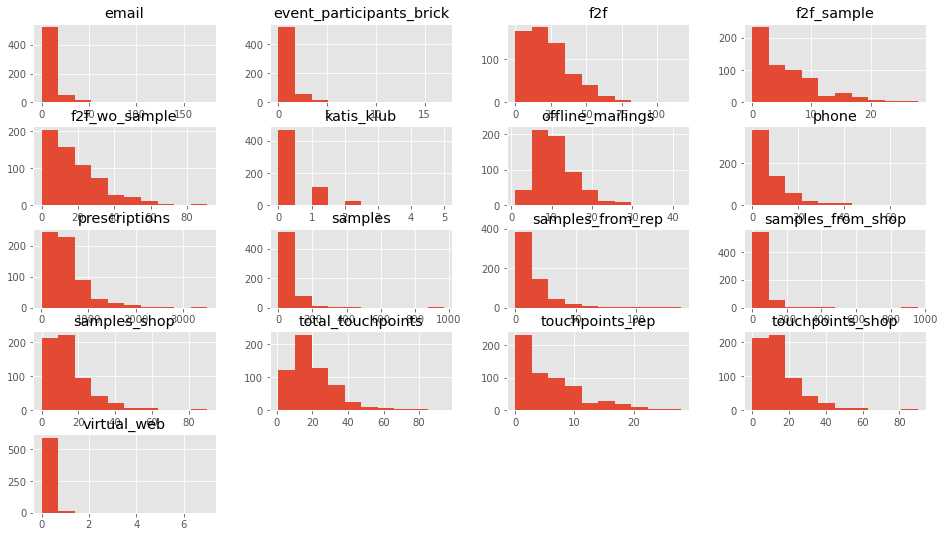

In [23]:
df_clean_full.hist()
plt.show()

In [24]:
df_clean_full.corr()

,email,f2f,f2f_wo_sample,f2f_sample,samples_shop,phone,virtual_web,total_touchpoints,samples,samples_from_shop,touchpoints_shop,samples_from_rep,touchpoints_rep,katis_klub,event_participants_brick,offline_mailings,prescriptions
email,1.000000,0.184021,0.218260,-0.007033,0.102564,0.166360,0.025323,0.095600,0.066087,0.087358,0.102564,-0.067820,-0.007033,0.035064,0.170954,0.119640,0.024968
f2f,0.184021,1.000000,0.950511,0.600334,0.059473,-0.004743,0.185758,0.319788,0.194215,0.060585,0.059473,0.474713,0.600334,0.133086,0.026750,0.535672,0.322467
f2f_wo_sample,0.218260,0.950511,1.000000,0.322206,0.124218,0.013360,0.140499,0.260433,0.160484,0.096687,0.124218,0.232045,0.322206,0.099985,0.034706,0.465910,0.243900
f2f_sample,-0.007033,0.600334,0.322206,1.000000,-0.138934,-0.060794,0.203772,0.303704,0.178442,-0.064509,-0.138934,0.849125,1.000000,0.141433,-0.011103,0.422459,0.343672
samples_shop,0.102564,0.059473,0.124218,-0.138934,1.000000,0.341522,0.022213,0.901332,0.658888,0.715042,1.000000,-0.140366,-0.138934,0.205461,0.219460,0.380460,0.253008
phone,0.166360,-0.004743,0.013360,-0.060794,0.341522,1.000000,0.234162,0.301988,0.228797,0.254184,0.341522,-0.068975,-0.060794,0.111059,0.392111,0.277026,0.183757
virtual_web,0.025323,0.185758,0.140499,0.203772,0.022213,0.234162,1.000000,0.110495,0.078375,0.028282,0.022213,0.178397,0.203772,0.065576,0.258491,0.106559,0.131736
total_touchpoints,0.095600,0.319788,0.260433,0.303704,0.901332,0.301988,0.110495,1.000000,0.711960,0.659726,0.901332,0.236337,0.303704,0.259532,0.206285,0.550811,0.393731
samples,0.066087,0.194215,0.160484,0.178442,0.658888,0.228797,0.078375,0.711960,1.000000,0.958884,0.658888,0.221125,0.178442,0.239406,0.146698,0.357289,0.275735
samples_from_shop,0.087358,0.060585,0.096687,-0.064509,0.715042,0.254184,0.028282,0.659726,0.958884,1.000000,0.715042,-0.064738,-0.064509,0.195639,0.140018,0.281182,0.202608


## Prepare Data for Model

### Visualize

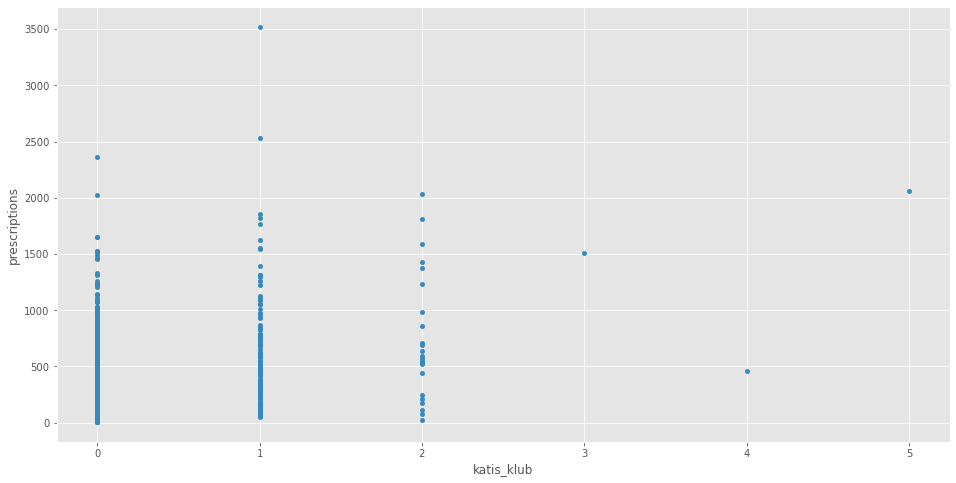

In [25]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='katis_klub', y='prescriptions',  figsize=(16, 8))

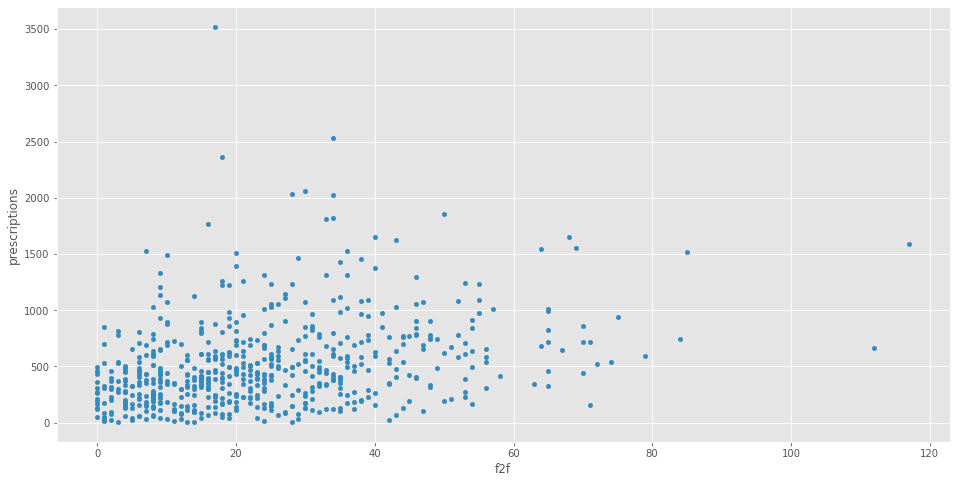

In [26]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='f2f', y='prescriptions',  figsize=(16, 8))

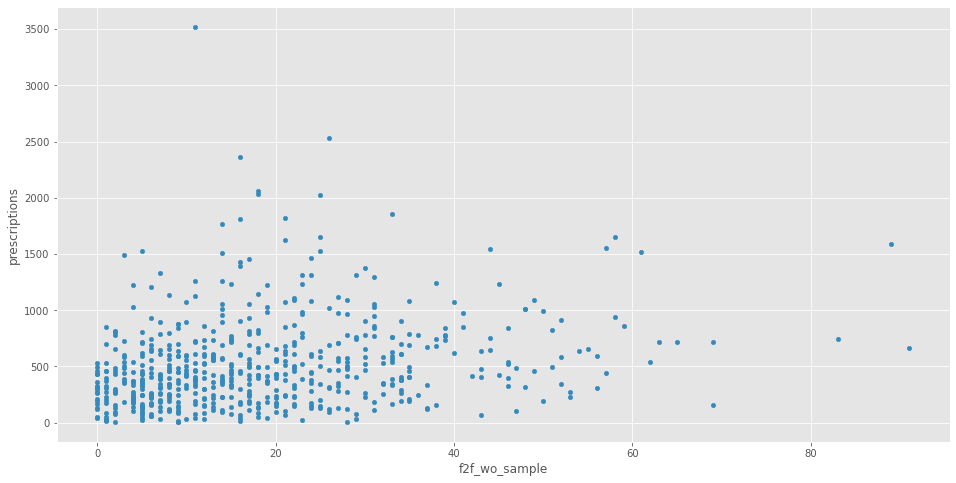

In [27]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='f2f_wo_sample', y='prescriptions',  figsize=(16, 8))

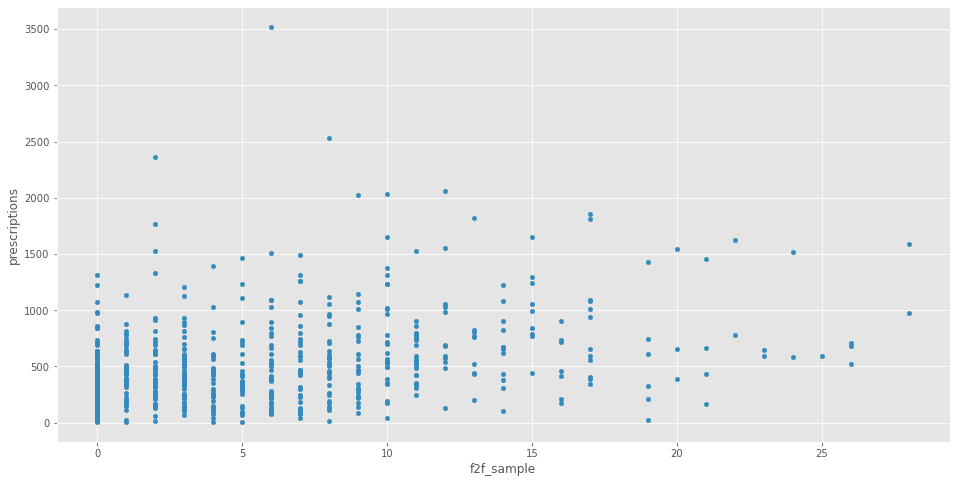

In [28]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='f2f_sample', y='prescriptions',  figsize=(16, 8))

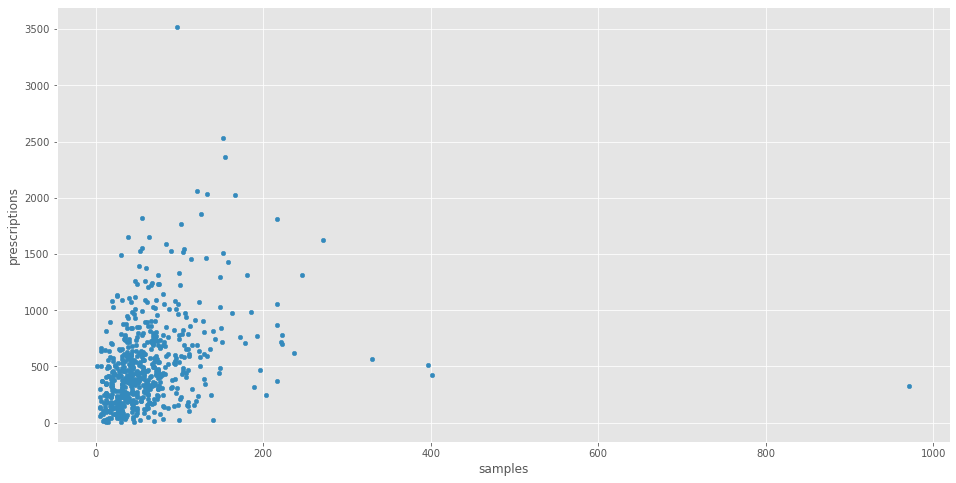

In [29]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='samples', y='prescriptions',  figsize=(16, 8))

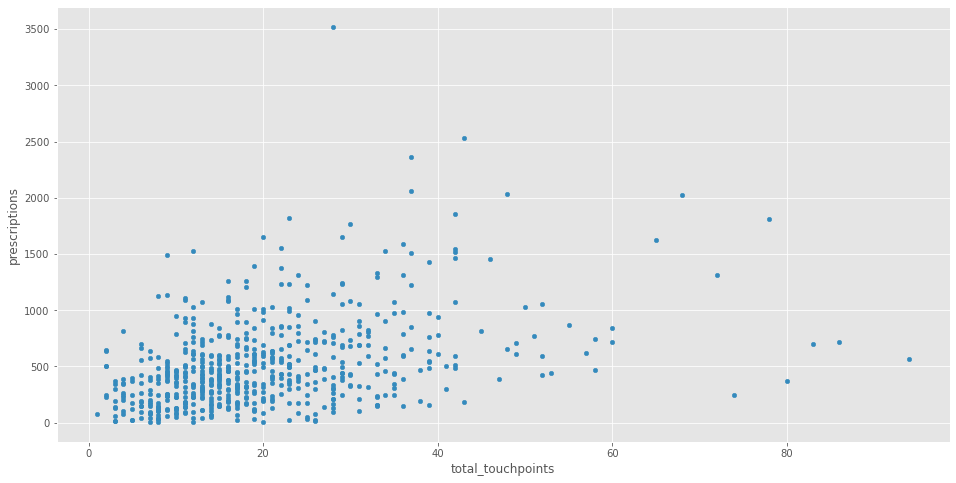

In [30]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='total_touchpoints', y='prescriptions',  figsize=(16, 8))

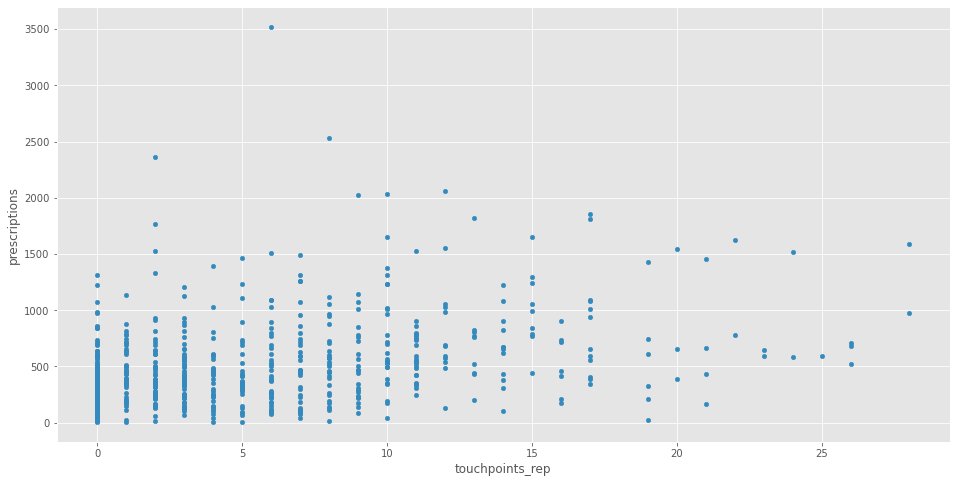

In [31]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='touchpoints_rep', y='prescriptions',  figsize=(16, 8))

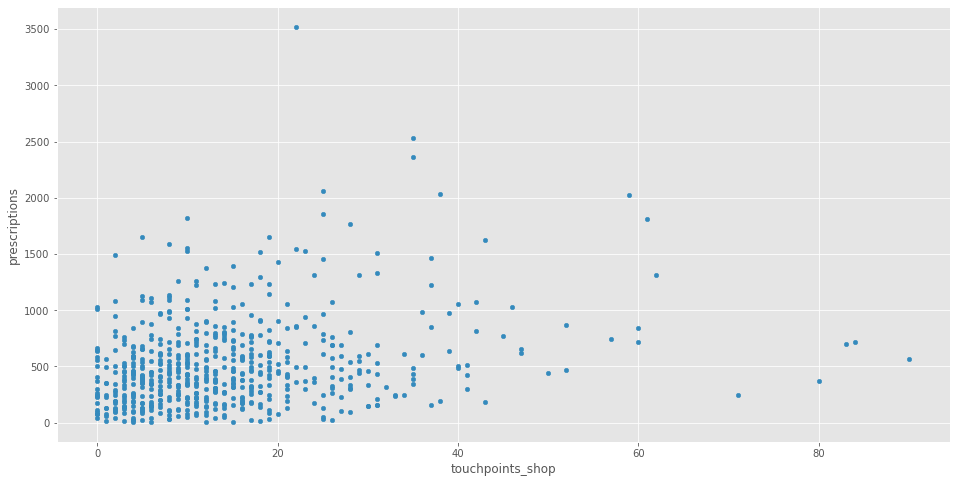

In [32]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='touchpoints_shop', y='prescriptions',  figsize=(16, 8))

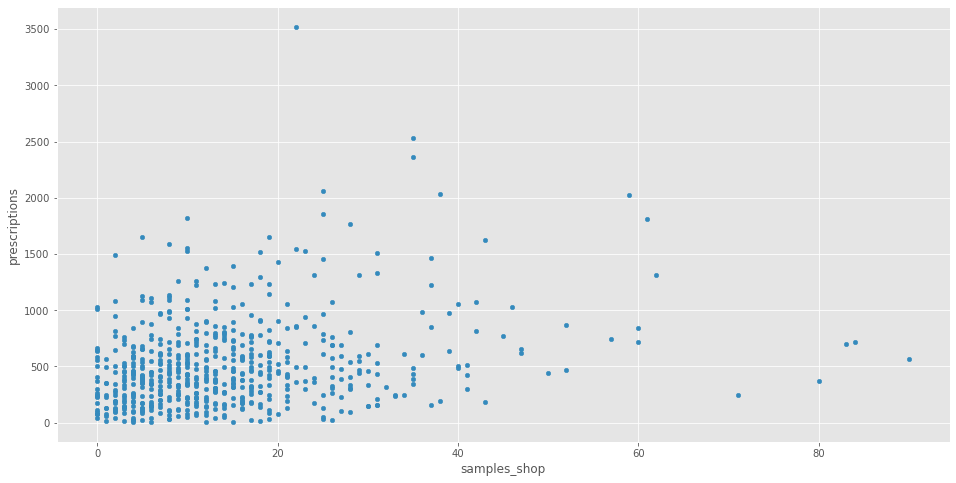

In [33]:
# visualize the relationship between the features and response using scatterplots (25)
df_clean_full.plot(kind='scatter', x='samples_shop', y='prescriptions',  figsize=(16, 8))

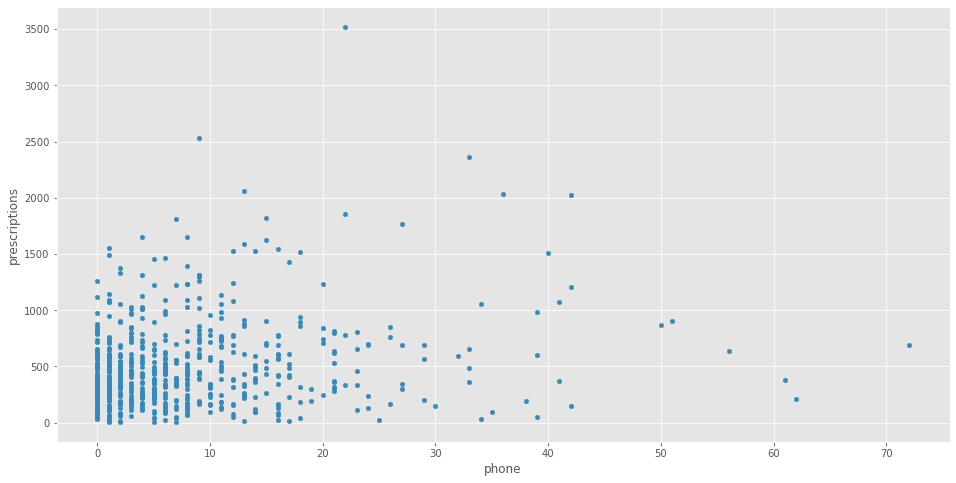

In [34]:
# visualize the relationship between the features and response using scatterplots (25)
df_clean_full.plot(kind='scatter', x='phone', y='prescriptions',  figsize=(16, 8))

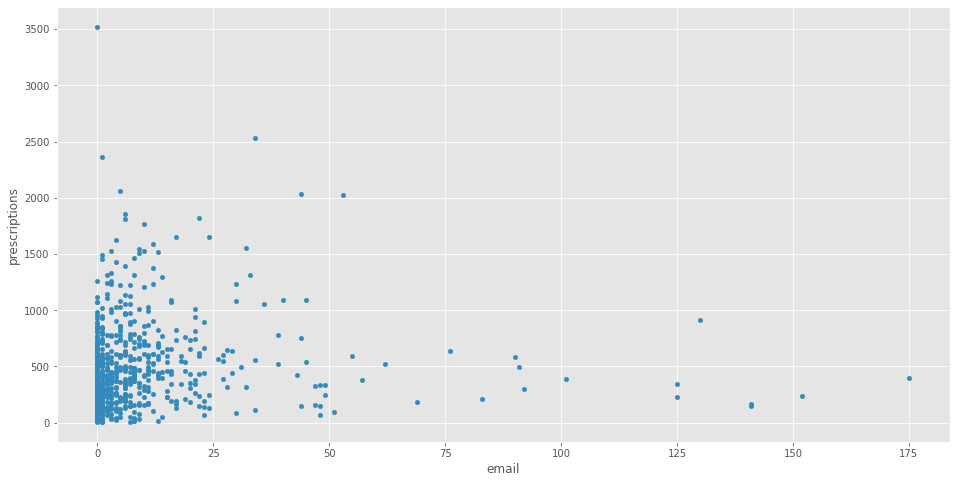

In [35]:
# visualize the relationship between the features and response using scatterplots (10)
df_clean_full.plot(kind='scatter', x='email', y='prescriptions',  figsize=(16, 8))

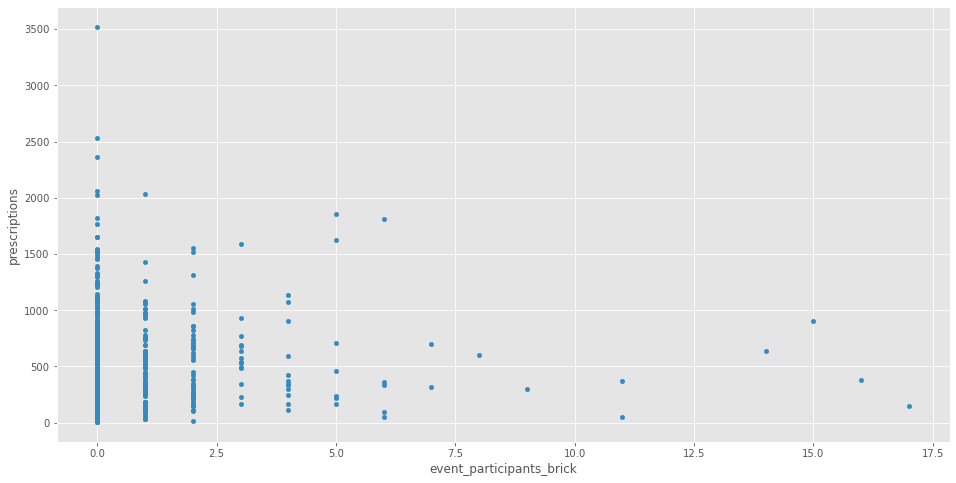

In [36]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='event_participants_brick', y='prescriptions',  figsize=(16, 8))

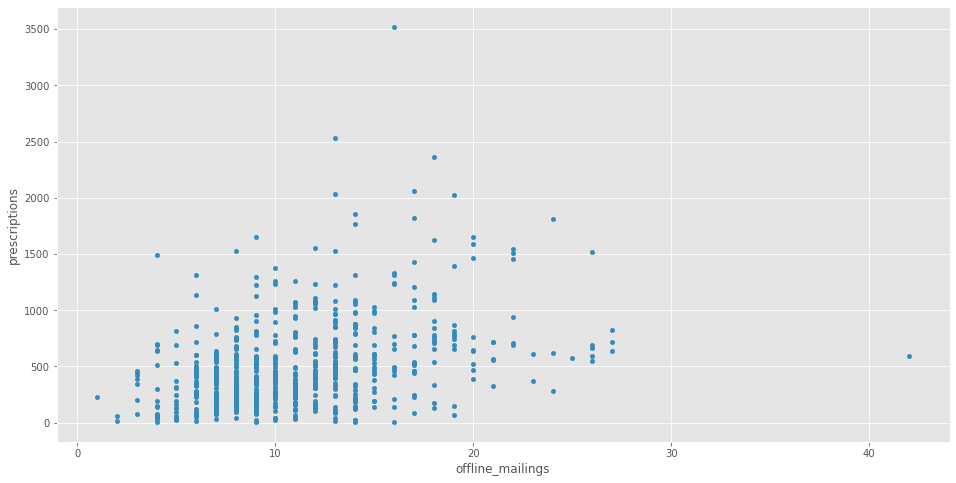

In [37]:
# visualize the relationship between the features and response using scatterplots
df_clean_full.plot(kind='scatter', x='offline_mailings', y='prescriptions',  figsize=(16, 8))

### Delete non-statistically-significant variables

In [38]:
count = (df_clean_full[['email', 'f2f', 'f2f_wo_sample', 'total_touchpoints', 'samples', 'samples_from_shop', 'touchpoints_shop', 'samples_from_rep', 'touchpoints_rep', 'phone', 'katis_klub', 'event_participants_brick', 'offline_mailings', 'virtual_web', 'prescriptions']] == 0).sum()
print(count)

email                       126
f2f                          13
f2f_wo_sample                19
total_touchpoints             0
samples                       0
samples_from_shop            21
touchpoints_shop             21
samples_from_rep            135
touchpoints_rep             135
phone                        76
katis_klub                  468
event_participants_brick    429
offline_mailings              0
virtual_web                 590
prescriptions                 0
dtype: int64


In [39]:
df_clean = df_clean_full.dropna()

In [40]:
df_clean = df_clean.drop(columns=['touchpoints_shop', 'touchpoints_rep', 'samples', 'total_touchpoints', 'f2f', 'virtual_web', 'event_participants_brick','katis_klub','samples_from_shop','samples_from_rep'])

In [41]:
df_clean.columns

Index(['email', 'f2f_wo_sample', 'f2f_sample', 'samples_shop', 'phone',
       'offline_mailings', 'prescriptions'],
      dtype='object')

In [42]:
df_clean.describe()

,email,f2f_wo_sample,f2f_sample,samples_shop,phone,offline_mailings,prescriptions
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,10.257426,18.468647,5.706271,14.764026,8.463696,11.237624,519.247525
std,19.612352,14.798643,5.754153,12.657553,9.792450,4.791829,402.274128
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,7.000000,1.000000,6.000000,2.000000,8.000000,242.500000
50%,4.000000,15.000000,4.000000,12.000000,6.000000,11.000000,435.000000
75%,11.000000,26.000000,9.000000,19.000000,11.000000,14.000000,690.000000
max,175.000000,91.000000,28.000000,90.000000,72.000000,42.000000,3522.000000


In [43]:
df_clean.corr()

,email,f2f_wo_sample,f2f_sample,samples_shop,phone,offline_mailings,prescriptions
email,1.000000,0.218260,-0.007033,0.102564,0.164940,0.116624,0.022553
f2f_wo_sample,0.218260,1.000000,0.322206,0.124218,0.013360,0.465910,0.243900
f2f_sample,-0.007033,0.322206,1.000000,-0.138934,-0.060794,0.422459,0.343672
samples_shop,0.102564,0.124218,-0.138934,1.000000,0.341522,0.380460,0.253008
phone,0.164940,0.013360,-0.060794,0.341522,1.000000,0.273601,0.180813
offline_mailings,0.116624,0.465910,0.422459,0.380460,0.273601,1.000000,0.360550
prescriptions,0.022553,0.243900,0.343672,0.253008,0.180813,0.360550,1.000000


## OLS Regression

### Linear - Linear

In [214]:
X = df_clean[['f2f']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['f2f', 'samples', 'katis_klub', 'email', 'phone']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['f2f', 'samples', 'phone', 'katis_klub']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['f2f', 'samples', 'event_participants', 'email', 'phone', 'katis_klub']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['email', 'f2f_wo_sample', 'total_touchpoints', 'phone', 'offline_mailings']]
y = df_clean[['prescriptions']]

In [44]:
X = df_clean[['email', 'f2f_wo_sample', 'f2f_sample', 'samples_shop', 'phone', 'offline_mailings']]
y = df_clean[['prescriptions']]

In [45]:
X.shape

(606, 6)

In [302]:
X.head()

,email,f2f_wo_sample,f2f_sample,samples_shop,phone,offline_mailings
0,11.0,22.0,8.0,4.0,6.0,8
1,0.0,13.0,5.0,8.0,14.0,10
2,3.0,15.0,15.0,17.0,16.0,19
3,17.0,51.0,14.0,15.0,9.0,27
4,4.0,8.0,3.0,2.0,7.0,6


In [303]:
X = sm.add_constant(X)

In [304]:
model = sm.OLS(y, X).fit()

In [305]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          prescriptions   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     30.56
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           4.70e-32
Time:                        12:20:21   Log-Likelihood:                -4412.7
No. Observations:                 606   AIC:                             8839.
Df Residuals:                     599   BIC:                             8870.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              143.2492     37.231  

### Log-Log / Elasticity

In [ ]:
X = df_clean[['f2f', 'samples', 'event_participants', 'offline_mailings', 'email', 'phone', 'katis_klub']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['f2f', 'samples', 'offline_mailings', 'katis_klub']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['f2f', 'samples', 'email', 'phone', 'katis_klub']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['email', 'mailchimp', 'f2f', 'samples', 'total_touchpoints', 'total_samples', 'samples_from_shop', 'touchpoints_shop', 'samples_from_rep', 'touchpoints_rep', 'phone', 'katis_klub', 'event_participants_brick', 'offline_mailings', 'prescriptions']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['email', 'f2f_wo_sample', 'total_touchpoints', 'phone', 'offline_mailings']]
y = df_clean[['prescriptions']]

In [222]:
X = df_clean[['email', 'f2f_wo_sample', 'touchpoints_shop', 'touchpoints_rep', 'phone', 'offline_mailings']]
y = df_clean[['prescriptions']]

In [223]:
X += 0.1
y += 0.1

X = np.log(X)
y = np.log(y)

In [224]:
X = sm.add_constant(X)

In [225]:
model = sm.OLS(y, X).fit()

In [226]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          prescriptions   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     26.59
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.97e-28
Time:                        11:22:20   Log-Likelihood:                -738.44
No. Observations:                 606   AIC:                             1491.
Df Residuals:                     599   BIC:                             1522.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.5663      0.191  

### Log(y) - Lin(X)

In [45]:
X = df_clean[['phone']]
y = df_clean[['prescriptions']]

In [48]:
X = df_clean[['f2f', 'samples', 'event_participants', 'offline_mailings', 'email', 'phone', 'katis_klub']]
y = df_clean[['prescriptions']]

In [ ]:
X = df_clean[['f2f', 'samples', 'event_participants', 'offline_mailings', 'email', 'phone', 'katis_klub']]
y = df_clean[['prescriptions']]

In [89]:
X = df_clean[['email', 'mailchimp', 'f2f', 'samples', 'total_touchpoints', 'total_samples', 'samples_from_shop', 'touchpoints_shop', 'samples_from_rep', 'touchpoints_rep', 'phone', 'katis_klub', 'event_participants_brick', 'offline_mailings', 'prescriptions']]
y = df_clean[['prescriptions']]

In [90]:
#y = y.mask(y == 0, 1)

y = np.log(y)

In [91]:
X = sm.add_constant(X)

In [92]:
model = sm.OLS(y, X).fit()

In [93]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          prescriptions   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     105.3
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          3.48e-138
Time:                        12:59:26   Log-Likelihood:                -464.90
No. Observations:                 606   AIC:                             955.8
Df Residuals:                     593   BIC:                             1013.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Find the Max Point: Analysis of Logarithmic-Behaviour Variables

### F2F Meetings

In [50]:
df_f2f = df_clean_full[['f2f','prescriptions']]

In [51]:
df_f2f_min = df_f2f[df_f2f['f2f'] <= 25]

In [52]:
df_f2f_max = df_f2f[df_f2f['f2f'] > 25]

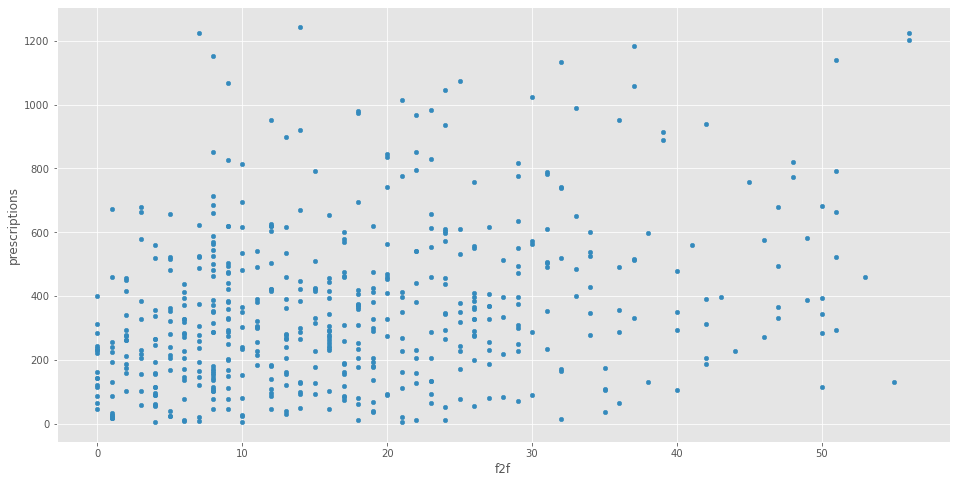

In [53]:
# F2F meetings
df_f2f.plot(kind='scatter', x='f2f', y='prescriptions', figsize=(16, 8))

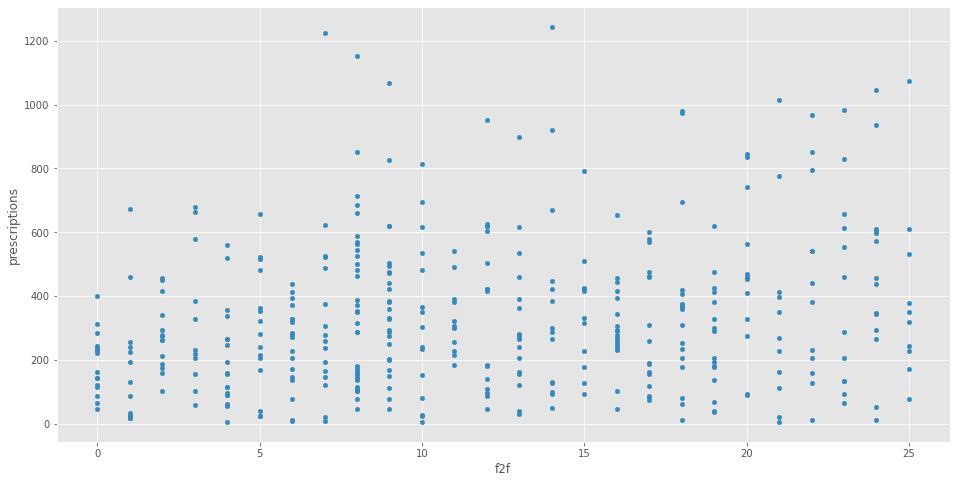

In [54]:
# F2F meetings
df_f2f_min.plot(kind='scatter', x='f2f', y='prescriptions', figsize=(16, 8))

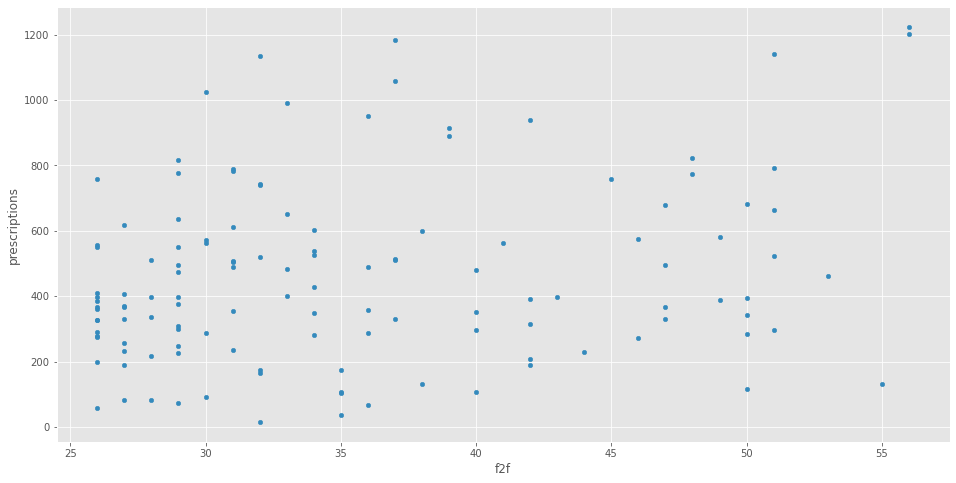

In [55]:
# F2F meetings
df_f2f_max.plot(kind='scatter', x='f2f', y='prescriptions', figsize=(16, 8))

### Samples

In [56]:
df_samples = df_clean_full[['samples','prescriptions']]

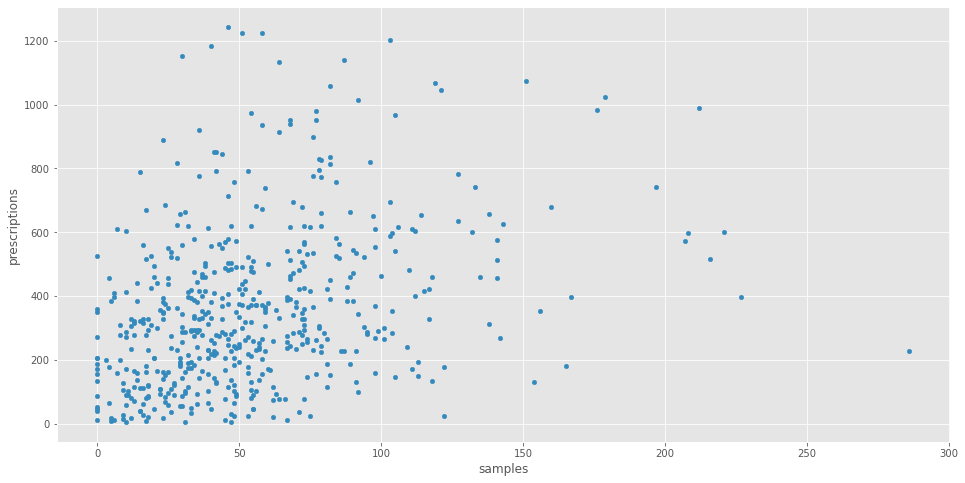

In [57]:
# Samples
df_samples.plot(kind='scatter', x='samples', y='prescriptions',  figsize=(16, 8))

In [58]:
df_samples_min = df_samples[df_samples['samples'] <= 125]

In [59]:
df_samples_max = df_samples[df_samples['samples'] > 125]

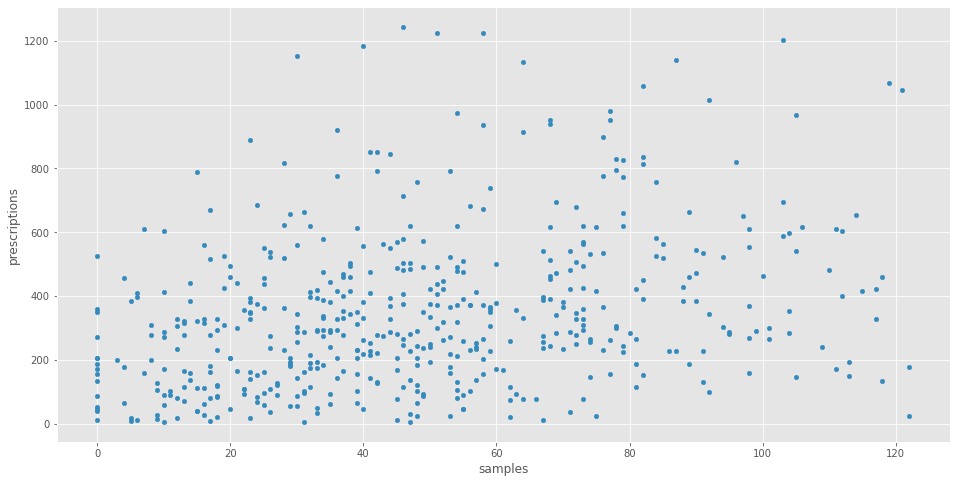

In [60]:
# Samples
df_samples_min.plot(kind='scatter', x='samples', y='prescriptions', figsize=(16, 8))

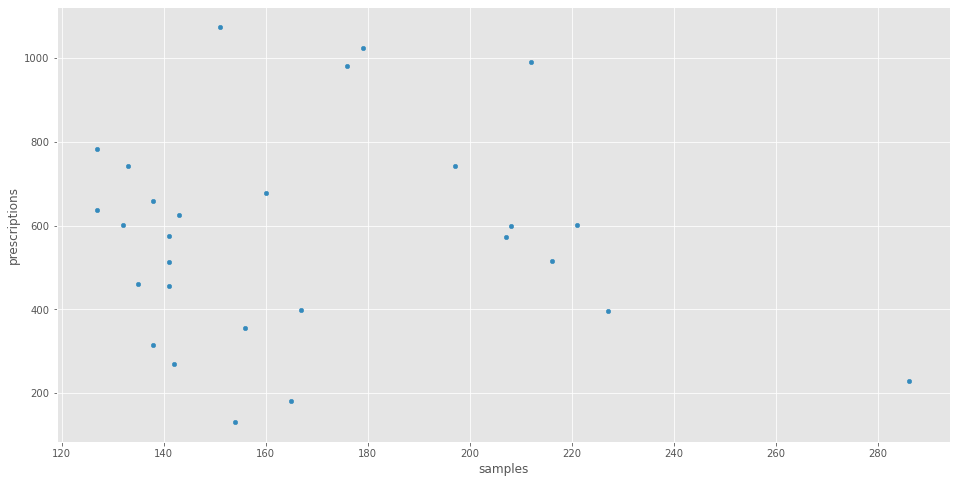

In [61]:
# Samples
df_samples_max.plot(kind='scatter', x='samples', y='prescriptions', figsize=(16, 8))

********************************

#### IDEA 1: Try to calculate slopes for different dataset parts

#### IDEA 2: Try to calculate derivates where tangent to Log curve makes m = 0 (starts to be negative) for each variable (2)

In [50]:
#F2F Meetings

X = df_clean['f2f_sample']
y = df_clean['prescriptions']

In [49]:
#F2F Meetings

X = df_clean['f2f_wo_sample']
y = df_clean['prescriptions']

In [58]:
X = X.mask(X == 0, 1)
X = X.astype(int)

In [59]:
median_y = 1
y = y.mask(y == 0, median_y)
y = y.astype(int)

In [60]:
#fit the model
model_log = np.polyfit(np.log(X), y, 1)

#view the output of the model
print(model_log)

[ 79.57556389 159.31865945]


In [61]:
b = 64.5898188*np.log(0) + 153.2429073
print(b)

-inf


<ipython-input-61-86cc66609439>:1: RuntimeWarning: divide by zero encountered in log
  b = 64.5898188*np.log(0) + 153.2429073


In [62]:
a = ((-1)*(64.5898188))/10000
print(a)

-0.006458981880000001


## Visualization of data with Line

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as metric

In [90]:
model = LinearRegression()

In [91]:
model.fit(X = df_clean[['phone']], y = df_clean[['prescriptions']])

LinearRegression()

In [92]:
# make predictions for those x values and store them
lims = model.predict(np.array([df_clean['phone'].min(), df_clean['phone'].max()]).reshape(-1, 1))
lims

array([[456.38090317],
       [991.18231338]])

In [93]:
df_clean['phone'].min()

0.0

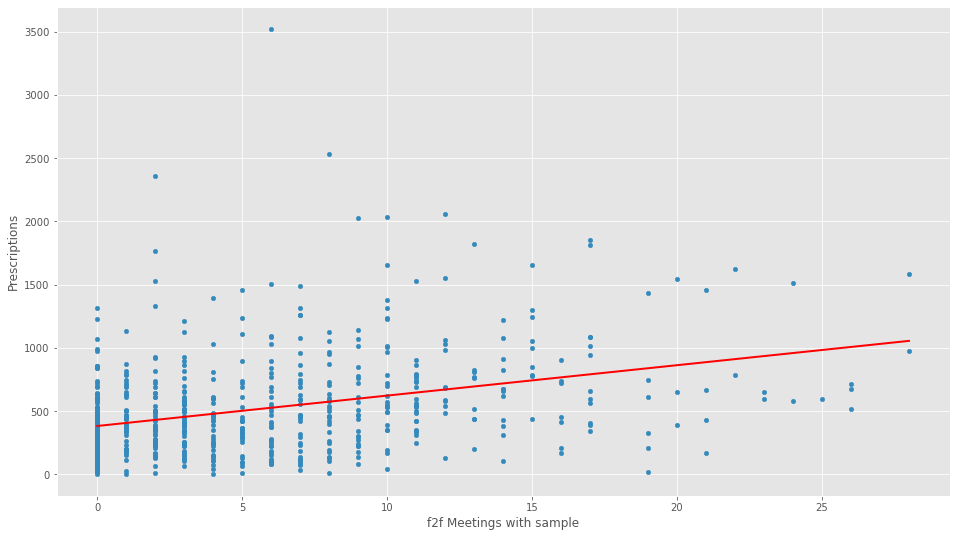

In [61]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='f2f_sample', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['f2f_sample'].min(), df_clean['f2f_sample'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('F2F Meetings with sample')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

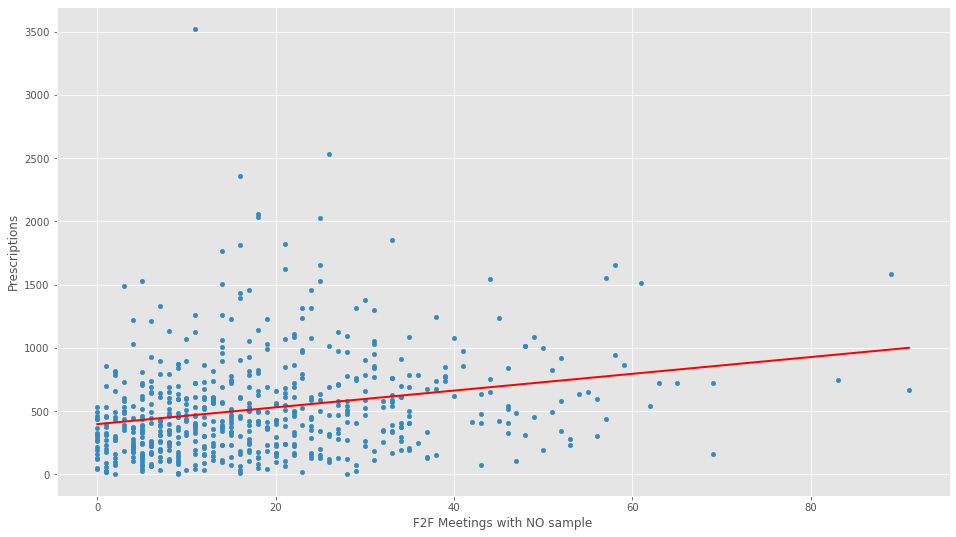

In [70]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='f2f_wo_sample', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['f2f_wo_sample'].min(), df_clean['f2f_wo_sample'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('F2F Meetings with NO sample')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

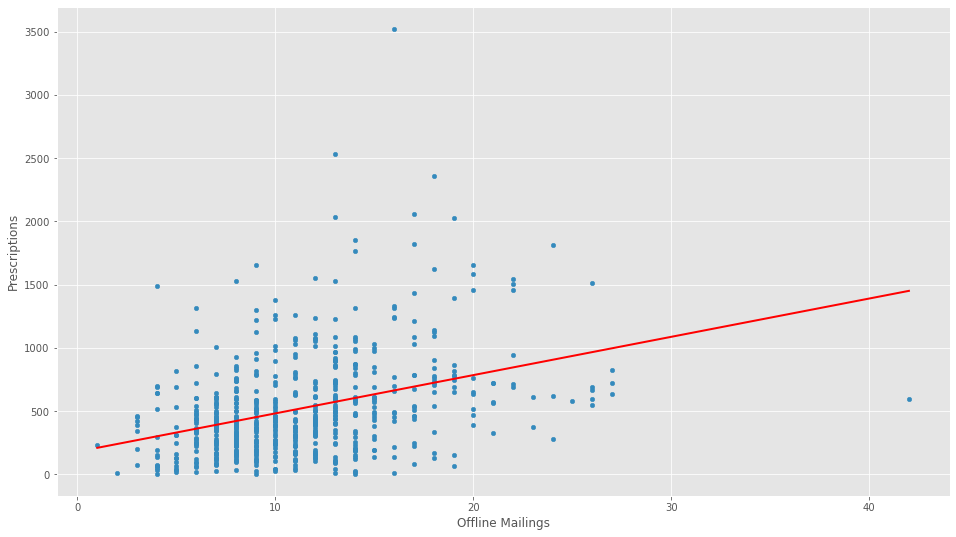

In [76]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='offline_mailings', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['offline_mailings'].min(), df_clean['offline_mailings'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('Offline Mailings')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

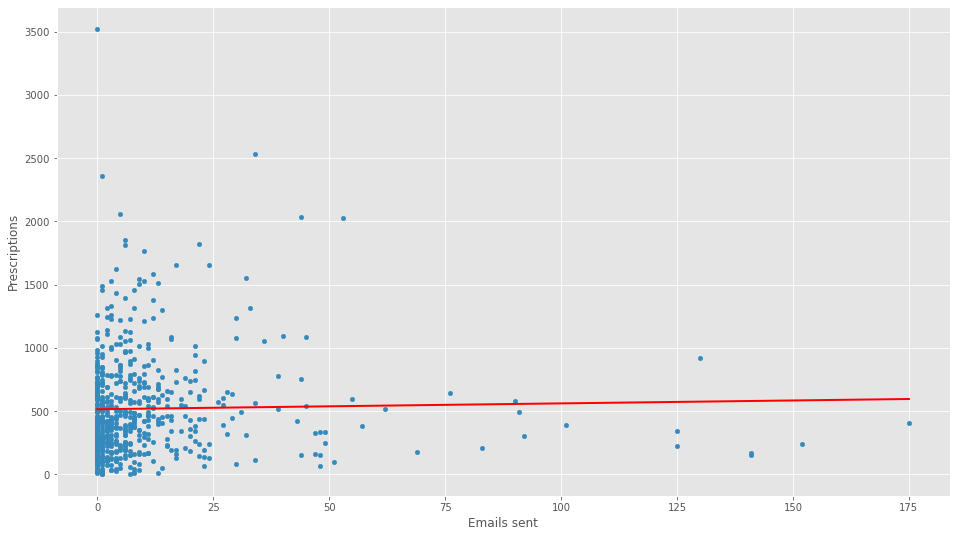

In [82]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='email', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['email'].min(), df_clean['email'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('Emails sent')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

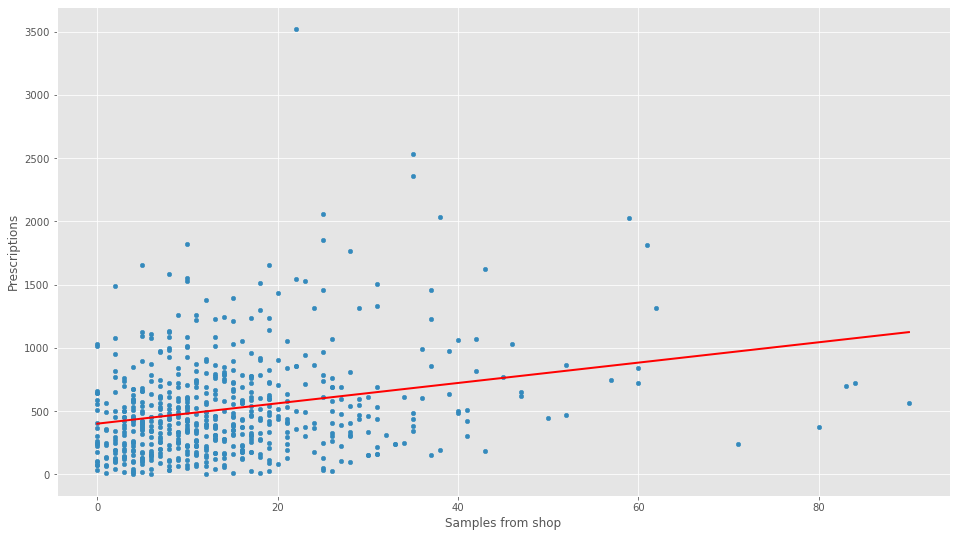

In [88]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='samples_shop', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['samples_shop'].min(), df_clean['samples_shop'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('Samples from shop')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

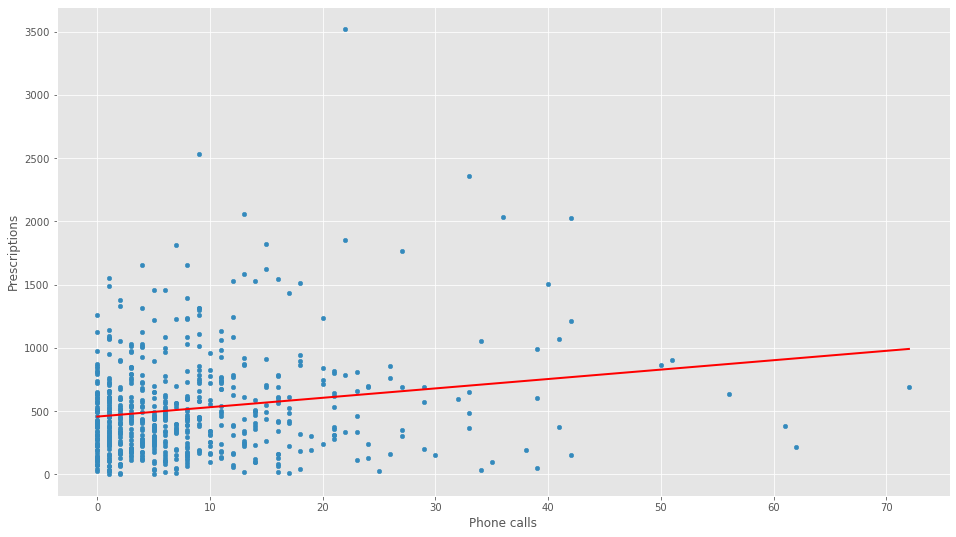

In [94]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='phone', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['phone'].min(), df_clean['phone'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('Phone calls')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

## Split Data

In [63]:
perc_values = [0.70, 0.08, 0.22];

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=perc_values[2], random_state=1);

In [65]:
print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))
print('Test data size = ' + str(X_test.shape))
print('Test target size = ' + str(y_test.shape))

Train data size = (419,)
Train target size = (419,)
Test data size = (119,)
Test target size = (119,)


## Linear Regression: With 1 Variable

### Model creation

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
from sklearn.metrics import mean_absolute_error as metric

In [53]:
model = LinearRegression()

In [54]:
model.fit(X = df_clean[['f2f_sample']], y = df_clean[['prescriptions']])

LinearRegression()

In [55]:
# print intercept and coefficients
print ('w_0 = ' + str(model.intercept_))
print ('w_1 = ' + str(model.coef_))

w_0 = [382.14751393]
w_1 = [[24.02620201]]


In [ ]:
pred_train = model.predict(X_train[['f2f']])
#pred_val = model.predict(X_val[['f2f']])
pred_test = model.predict(X_test[['f2f']])

In [ ]:
print(pred_test[0:5])
print(np.array(y_test['Prescriptions'][0:5]))

In [ ]:
mae_train = metric(y_train, pred_train)
#mae_val = metric(y_val, pred_val)
mae_test = metric(y_test, pred_test)
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['1 Variable'],'mae_train':[mae_train],'mae_test':[mae_test]}, columns=['model', 'mae_train', 'mae_test']), ignore_index=True)

In [ ]:
results

### Visualize

In [56]:
# make predictions for those x values and store them
lims = model.predict(np.array([df_clean['f2f_sample'].min(), df_clean['f2f_sample'].max()]).reshape(-1, 1))
lims

array([[ 382.14751393],
       [1054.88117029]])

In [57]:
df_clean['f2f_sample'].min()

0.0

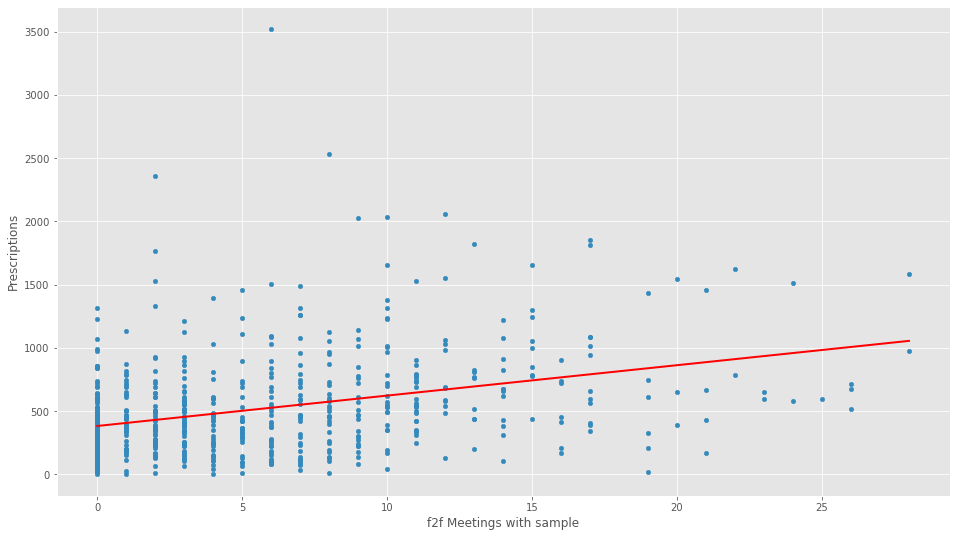

In [60]:
# first, plot the observed data
df_clean.plot(kind='scatter', x='f2f_sample', y='prescriptions')

# then, plot the least squares line
plt.plot(np.array([df_clean['f2f_sample'].min(), df_clean['f2f_sample'].max()]).reshape(-1, 1), lims,c='red', linewidth=2)
plt.xlabel('f2f Meetings with sample')
plt.ylabel('Prescriptions')
#plt.savefig('linear_f2f.png', bbox_inches='tight')
plt.show()

## Linear Regression: Multi-Variant

In [ ]:
model.fit(X = X_train[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']], y = y_train)

In [ ]:
# print intercept and coefficients
print ('w_0 = ' + str(model.intercept_))
print ('w_1 = ' + str(model.coef_[0][0]))
print ('w_2 = ' + str(model.coef_[0][1]))
print ('w_3 = ' + str(model.coef_[0][2]))
print ('w_4 = ' + str(model.coef_[0][3]))
print ('w_5 = ' + str(model.coef_[0][4]))
print ('w_6 = ' + str(model.coef_[0][5]))

In [ ]:
pred_train = model.predict(X_train[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']])
#pred_val = model.predict(X_val[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']])
pred_test = model.predict(X_test[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']])

In [ ]:
print(pred_test[0:5])
print(np.array(y_test['Prescriptions'][0:5]))

In [ ]:
mae_train = metric(y_train, pred_train)
#mae_val = metric(y_val, pred_val)
mae_test = metric(y_test, pred_test)

In [ ]:
results

In [ ]:
results = results.append(pd.DataFrame(data={'model':['Multivariable'],'mae_train':[mae_train],'mae_test':[mae_test]}, columns=['model', 'mae_train', 'mae_test']), ignore_index=True)
results

## OLS Regression

In [ ]:
## 0.a. With nulls=0 and outliers
X = pd.read_csv('bricks_channels_summarized.csv', sep=',', usecols=['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized.csv', sep=',', usecols=['Prescriptions'])

In [ ]:
## 0.b. With nulls=0 and NO outliers
df = pd.read_csv('bricks_channels_summarized.csv', sep=',', index_col=[0])
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
X = df_clean[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']]
y = df_clean[['Prescriptions']]

In [ ]:
## 1.a. Without outliers (but smaller sample, n = 553) 
df = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', index_col=[0])
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
X = df_clean[['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub']]
y = df_clean[['Prescriptions']]

In [ ]:
## 1.b. SIMPLE without outliers (but smaller sample) ---> BEST !!
df = pd.read_csv('detailled_channels_utf8.csv', index_col=[0])
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
X = df_clean[['f2f', 'total_samples', 'email_total', 'Phone_total', 'katis_klub']]
y = df_clean[['Prescriptions']]

In [ ]:
count = (df[['f2f', 'total_samples', 'email_total', 'Phone_total', 'katis_klub','Prescriptions']] == 0).sum()
print(count)

In [ ]:
df_clean_full.columns

In [ ]:
## 1.c. LOGARITHMIC SIMPLEST without outliers (but smaller sample, n = 553) ---> BEST !!
#df = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', index_col=[0])
#df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

X = df_clean_full[['f2f', 'total_samples', 'email', 'katis_klub','event_participants_brick','offline_mailings']]
y = df_clean_full[['Prescriptions']]

X = X.mask(X == 0, 0.1)
y = y.mask(y == 0, 1)

X = np.log(X)
y = np.log(y)

In [ ]:
## 2.a. With outliers (but higher sample, n = 611 - MEDIAN)
X = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['Prescriptions'])

In [ ]:
## 2.b. SIMPLE with outliers (but higher sample, n = 611 - MEDIAN) 
X = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['f2f', 'total_samples', 'Phone_total', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['Prescriptions'])

In [ ]:
## 2.c. LOGARITHMIC with outliers (but higher sample, n = 611 - MEDIAN)
X = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['Prescriptions'])

#X = X.mask(X == 0, 1)
y = y.mask(y == 0, 1)

X = np.log(X)
y = np.log(y)

In [ ]:
## 3. With outliers (but higher sample, n = 611 - MEAN)
X = pd.read_csv('bricks_channels_summarized_mean.csv', sep=';', usecols=['f2f', 'total_samples', 'email_total', 'Phone_total', 'vir_web', 'katis_klub'])
y = pd.read_csv('bricks_channels_summarized_mean.csv', sep=';', usecols=['Prescriptions'])

In [ ]:
#X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

## Logarithmic Model (WIP)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer


np.random.seed(123)

In [ ]:
X_array = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['f2f'], index_col=False)
y_array = pd.read_csv('bricks_channels_summarized_median.csv', sep=';', usecols=['Prescriptions'], index_col=False)

In [ ]:
X = pd.DataFrame(X_array, columns = ['f2f'])

In [ ]:
y = pd.DataFrame(y_array, columns = ['Prescriptions'])

In [ ]:
median_f2f = X['f2f'].median()
X = X.f2f.mask(X.f2f == 0, median_f2f)
X = X.astype(int)

In [ ]:
median_f2f = X['f2f'].median()
X = X.f2f.mask(X.f2f == 0, median_f2f)
X = X.astype(int)

median_y = 1
y = y.Prescriptions.mask(y.Prescriptions == 0, median_y)
y = y.astype(int)

#fit the model
model_log = np.polyfit(np.log(X), np.log(y), 1)

#view the output of the model
print(model_log)

In [ ]:
median_y = 1
y = y.Prescriptions.mask(y.Prescriptions == 0, median_y)
y = y.astype(int)

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
#fit the model
model_log = np.polyfit(np.log(X), np.log(y), 1)

#view the output of the model
print(model_log)

In [ ]:
## y = 0.39764207 + 4.51267631 lnX

In [ ]:
# Data
x_trans = transformer.fit_transform(X_array)             # 1

# Regression
regressor = LinearRegression()
results = regressor.fit(x_trans, y_array)                # 2
model = results.predict
y_fit = model(x_trans)

# Visualization
plt.scatter(x_samp, y_samp)
plt.plot(x_samp, y_fit, "k--", label="Fit")             # 3
plt.title("Logarithmic Fit")

In [ ]:
# Visualize

# make predictions for those x values and store them
lims = model_log.predict(np.array([df['f2f'].min(), df['f2f'].max()]).reshape(-1, 1))
lims

In [ ]:
# define a function for fitting
def func(x, a, b, c, d):
    return a * np.exp(-b * (x - c)) + d

init_vals = [50, 0, 90, 63]
# fit your data and getting fit parameters
popt, pcov = curve_fit(func, X, y, p0=init_vals, bounds=([0, 0, 90, 0], [1000, 0.1, 200, 200]))
# predict new data based on your fit
y_pred = func(200, *popt)
print(y_pred)

plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(xdata, func(xdata, *popt), '-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
y = pd.read_csv('bricks_channels_summarized.csv', usecols=['Prescriptions'])
print(y)